In [1]:
#Import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('health care diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.shape

(768, 9)

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Data Exploration:
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
 - Glucose

 - BloodPressure

 - SkinThickness

 - Insulin

 - BMI

Performing descriptive analysis:
    

In [4]:
desc_stats=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].describe()
desc_stats

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


2. Visually explore these variables using histograms. Treat the missing values accordingly.

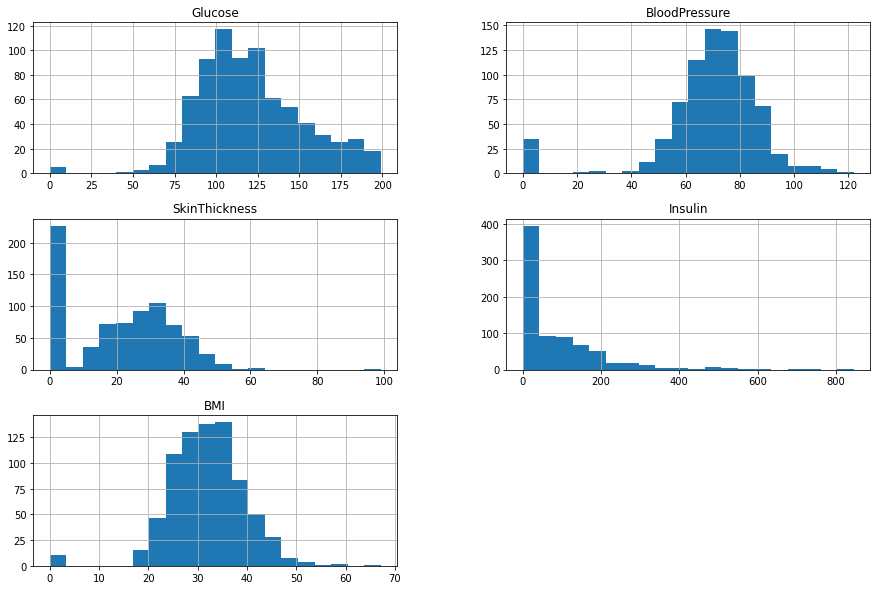

In [5]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(bins=20, figsize=(15, 10))
plt.show()

Here, Glucose and BMI is roughly normaly distributed, hence mean can be used to treat null values:

In [6]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


BloodPressure has outliers and SkinThickness and Insulin is skewed, hence median can be used to treat null values

In [8]:
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
data[data['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
data[data['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
desc_stats=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].describe()
desc_stats

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.681605,72.386719,27.334635,94.652344,32.450805
std,30.436016,12.096642,9.229014,105.547598,6.875374
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,23.000000,30.500000,27.500000
50%,117.000000,72.000000,23.000000,31.250000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


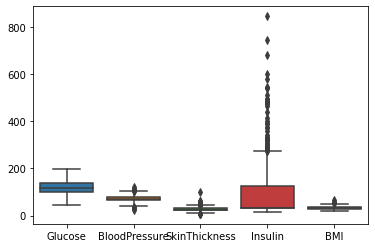

<Figure size 1440x1440 with 0 Axes>

In [12]:
sns.boxplot(data=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.figure(figsize=(20,20))
plt.show()

Standardizing values:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_std=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[col_std]=scaler.fit_transform(data[col_std])
data[col_std].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0.865276,-0.031990,0.831114,-0.608201,0.167255
1,-1.205989,-0.528319,0.180566,-0.608201,-0.851535
2,2.015979,-0.693761,-0.469981,-0.608201,-1.331821
3,-1.074480,-0.528319,-0.469981,-0.006185,-0.633222
4,0.503626,-2.679076,0.831114,0.695378,1.549899


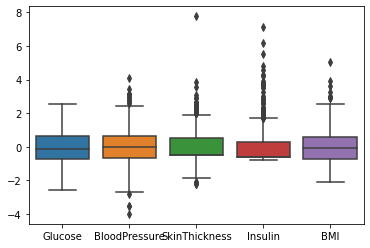

<Figure size 720x720 with 0 Axes>

In [14]:
sns.boxplot(data=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.figure(figsize=(10,10))
plt.show()

3. Create a count (frequency) plot describing the data types and the count of variables. 

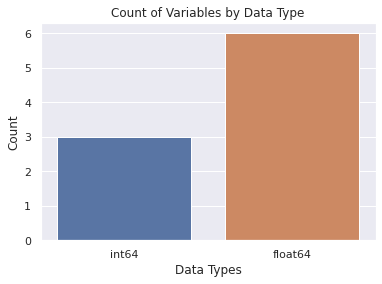

In [15]:
sns.set(style="darkgrid")
sns.countplot(x=data.dtypes)
plt.title('Count of Variables by Data Type')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.show()

4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

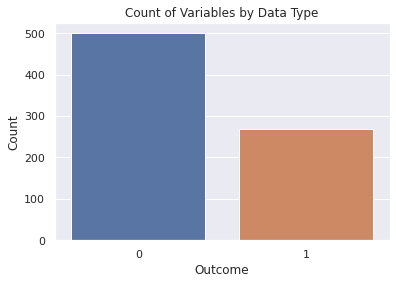

In [17]:
sns.set(style="darkgrid")
sns.countplot(x=data['Outcome'])
plt.title('Count of Variables by Data Type')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

The counts are imbalanced, it might impact the performance of machine learning models, hence we need to use an algorithm that handles imbalance well. Random Forest Classifier can be considered.

5. Create scatter charts between the pair of variables to understand the relationships.

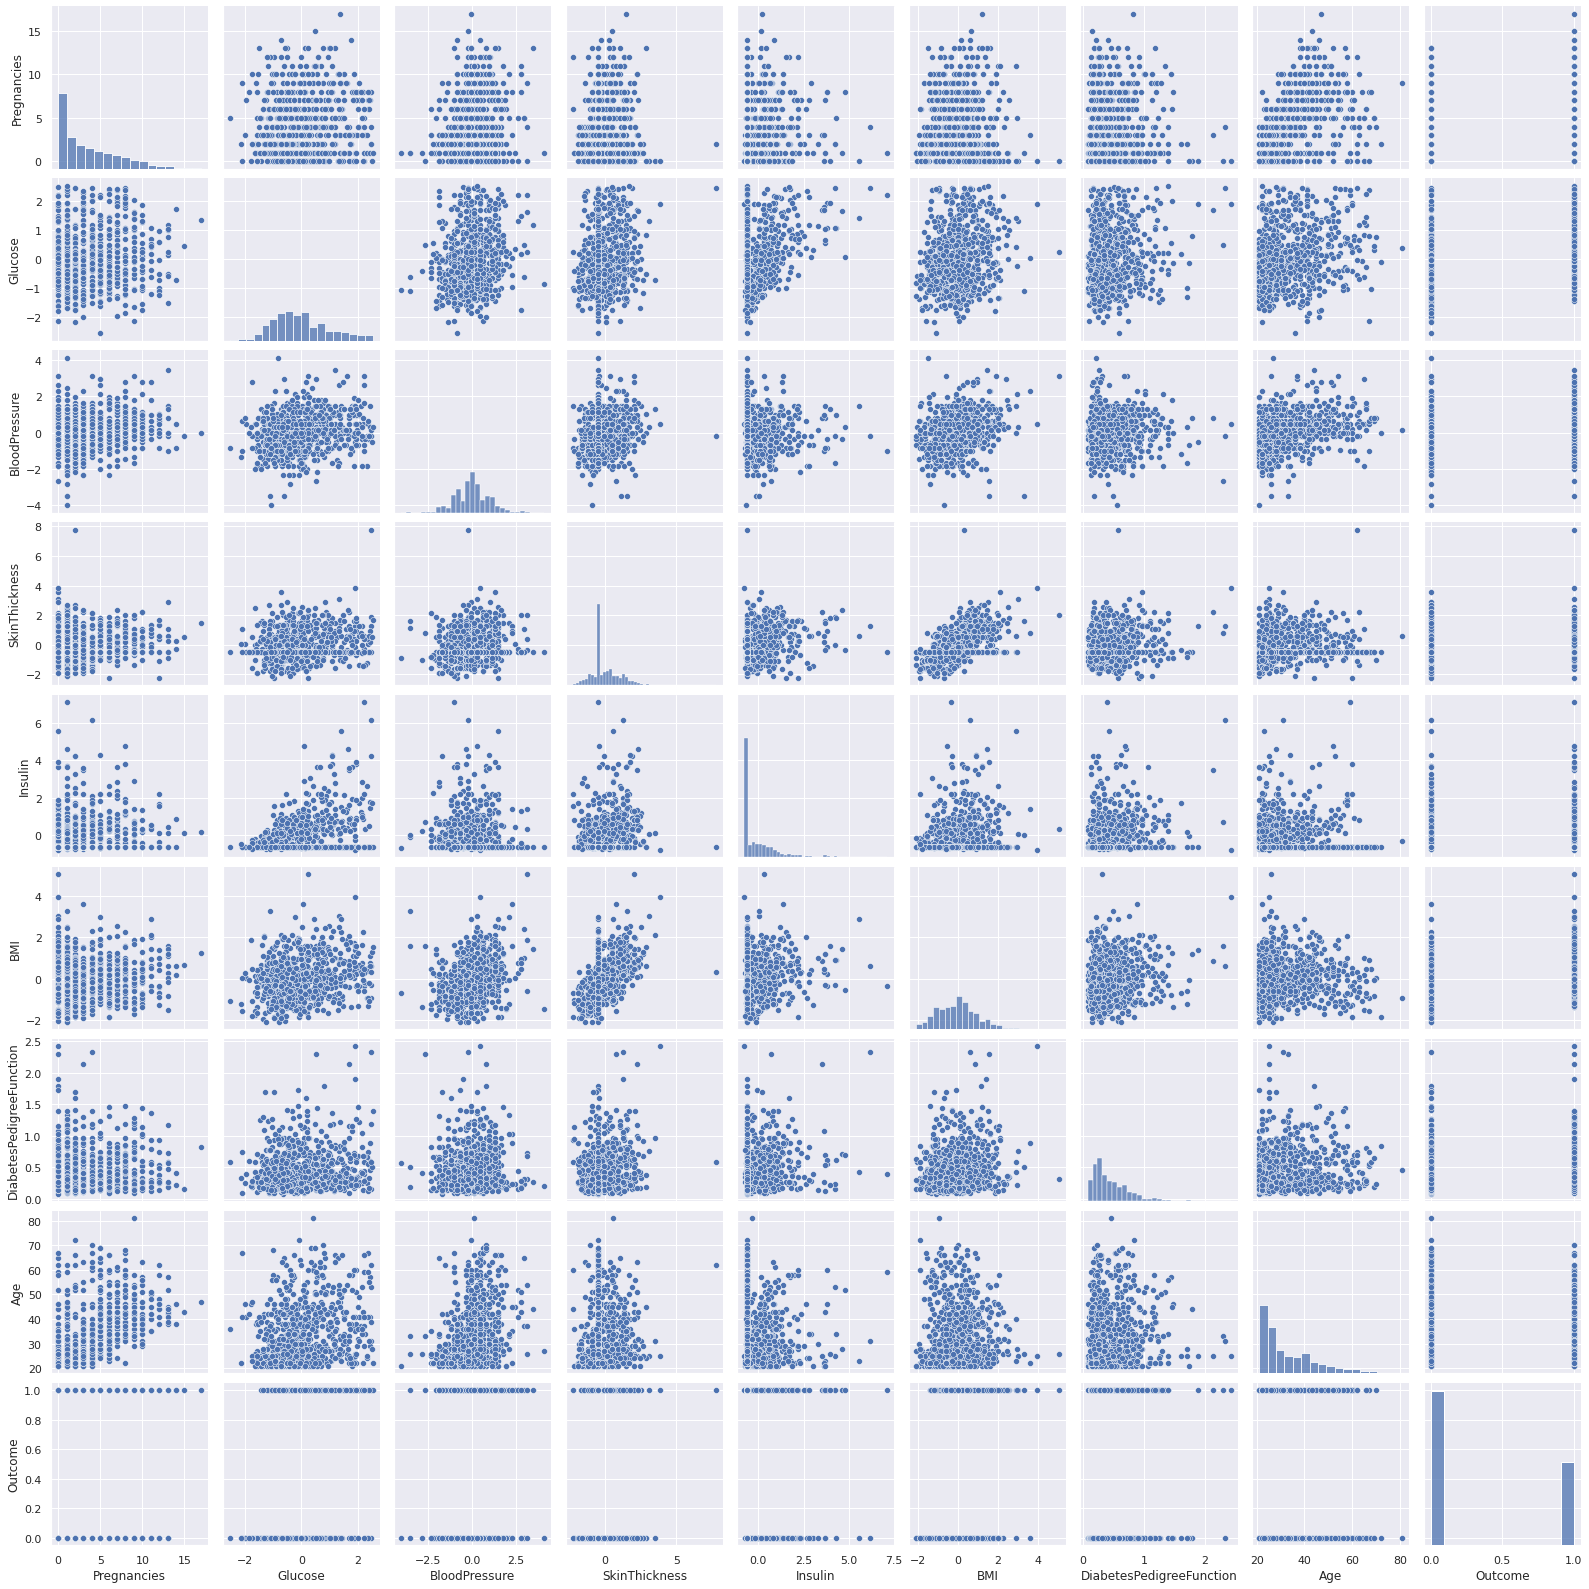

In [18]:
sns.pairplot(data)
plt.show()

6. Perform correlation analysis. Visually explore it using a heat map.

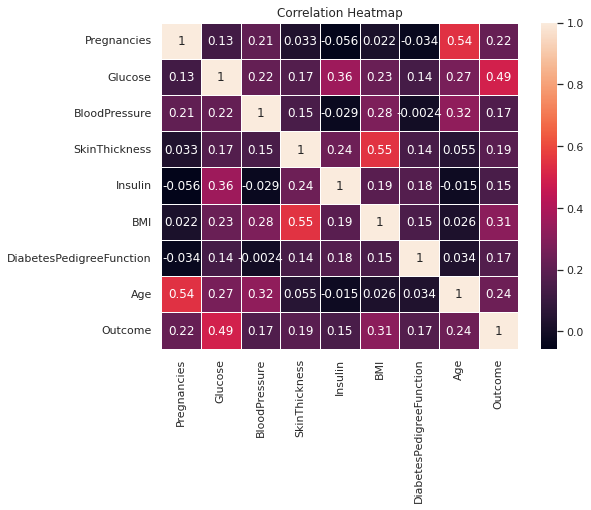

In [19]:
corr_matrix = data.corr()

# Create a heatmap
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Modeling

1. Devise strategies for model building.
2. Apply an appropriate classification algorithm to build a model.
3. Compare various models with the results from KNN algorithm.
4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=data['Outcome']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Train and evaluate KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

In [41]:
print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

KNN Results:
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [42]:
# Compare with other classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

In [46]:
for name,cf in classifiers.items():
    cf.fit(X_train_scaled, y_train)
    cf_pred=cf.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("\nAccuracy:",accuracy_score(y_test,cf_pred))
    print("Classification Report\n:", classification_report(y_test,cf_pred))


Decision Tree Results:

Accuracy: 0.7272727272727273
Classification Report
:               precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Random Forest Results:

Accuracy: 0.7727272727272727
Classification Report
:               precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154


Support Vector Machine Results:

Accuracy: 0.7532467532467533
Classification Report
:               precision    recall  f1-score   support

           0       0.79      0.85      0.82     

In [47]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [48]:
def calculate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity

In [49]:
def plot_roc_curve(y_true, y_prob, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_prob):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


KNN:
Sensitivity: 0.6545454545454545
Specificity: 0.8080808080808081


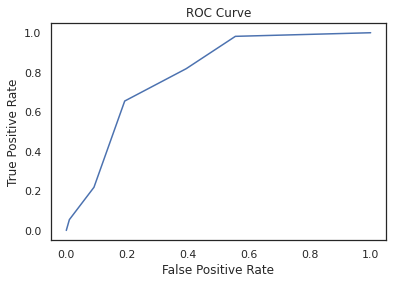

In [50]:
print("\nKNN:")
sensitivity, specificity = calculate(y_test, knn_predictions)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Plot ROC curve for KNN
knn_probabilities = knn_classifier.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, knn_probabilities, 'KNN')